In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np

sympy_modules = [{'Heaviside': lambda x: np.heaviside(x, 0.5)}, 'numpy']

from scipy.optimize import bisect

In [2]:
γ, c, α, μ, θ = sym.symbols(r'\gamma c \alpha \mu \theta', real=True, positive=True)
ξ, y, x = sym.symbols(r'\xi y x', real=True)

In [3]:
w = (1 - sym.Abs(x))*sym.exp(-sym.Abs(x))
Q = γ + (1-γ)*sym.exp(y/c/α/γ)

In [4]:
arg = w.subs(x, ξ-y)*Q

In [5]:
forcing_positive = sym.integrate(arg.subs(sym.Abs(ξ-y), ξ-y), (y, -sym.oo, 0))

In [6]:
forcing_negative = sym.integrate(arg.subs(sym.Abs(ξ-y), ξ-y), (y, -sym.oo, ξ)) + sym.integrate(arg.subs(sym.Abs(ξ-y), y-ξ), (y, ξ, 0)).args[0][0]
forcing_negative = forcing_negative.expand().collect(sym.exp(ξ)).collect(sym.exp(ξ/α/γ/c))

$\xi < 0$ 

In [7]:
U_left = sym.exp(ξ/c/μ) *(θ + sym.integrate(sym.exp(-ξ/c/μ)*forcing_negative, (ξ, 0, ξ)).args[-1][0])

In [8]:
U_left.simplify()

(\gamma*\mu*c**2*(-\alpha**5*\gamma**4*\mu*c**4 + 2*\alpha**4*\gamma**4*\mu*c**3 - \alpha**4*\gamma**4*c**2 + \alpha**4*\gamma**3*\mu**2*c**4 - 2*\alpha**4*\gamma**3*\mu*c**3 + \alpha**4*\gamma**3*c**2 + 2*\alpha**3*\gamma**3*\mu**2*c**3 - 4*\alpha**3*\gamma**3*\mu*c**2 + 2*\alpha**3*\gamma**3*c - 2*\alpha**3*\gamma**2*\mu**2*c**3 + 6*\alpha**3*\gamma**2*\mu*c**2 - 2*\alpha**3*\gamma**2*c - 3*\alpha**2*\gamma**2*\mu**2*c**2 + 2*\alpha**2*\gamma**2*\mu*c - \alpha**2*\gamma**2 + \alpha**2*\gamma*\mu**2*c**2 - 2*\alpha**2*\gamma*\mu*c + \alpha**2*\gamma - \alpha*\mu + \mu**2)*exp(\xi/(\mu*c)) + \gamma*\mu*c*(-\alpha**5*\gamma**4*\mu*\xi*c**5*exp(\xi) + \alpha**5*\gamma**4*\mu*c**5*exp(\xi) + \alpha**5*\gamma**4*\xi*c**4*exp(\xi) + \alpha**4*\gamma**4*\mu*\xi*c**4*exp(\xi) - 2*\alpha**4*\gamma**4*\mu*c**4*exp(\xi) - \alpha**4*\gamma**4*\xi*c**3*exp(\xi) + \alpha**4*\gamma**4*c**3*exp(\xi) + \alpha**4*\gamma**3*\mu**2*\xi*c**5*exp(\xi) - \alpha**4*\gamma**3*\mu**2*c**5*exp(\xi) - 2*\alpha**

$\xi > 0$

In [54]:
U_right = sym.exp(ξ/c/μ) *(θ + sym.integrate(sym.exp(-ξ/c/μ)*forcing_positive, (ξ, 0, ξ)))
U_right = U_right.simplify().collect(sym.exp(ξ*(μ*c+1)/μ/c))
display(U_right)

(\gamma*\mu*c*(\alpha**2*\gamma*\mu*\xi*c**3 + \alpha**2*\gamma*\mu*c**3 + \alpha**2*\gamma*\xi*c**2 + \alpha*\gamma*\mu*\xi*c**2 + 2*\alpha*\gamma*\mu*c**2 + \alpha*\gamma*\xi*c + \alpha*\gamma*c + \alpha*\mu*\xi*c**2 + \alpha*\xi*c - \alpha*c + \mu*\xi*c + \mu*c + \xi) + (\gamma*\mu*c**2*(-\alpha**2*\gamma*\mu*c**2 - 2*\alpha*\gamma*\mu*c - \alpha*\gamma + \alpha - \mu) + \theta*(\alpha**2*\gamma**2*\mu**2*c**4 + 2*\alpha**2*\gamma**2*\mu*c**3 + \alpha**2*\gamma**2*c**2 + 2*\alpha*\gamma*\mu**2*c**3 + 4*\alpha*\gamma*\mu*c**2 + 2*\alpha*\gamma*c + \mu**2*c**2 + 2*\mu*c + 1))*exp(\xi*(\mu*c + 1)/(\mu*c)))*exp(-\xi)/(\alpha**2*\gamma**2*\mu**2*c**4 + 2*\alpha**2*\gamma**2*\mu*c**3 + \alpha**2*\gamma**2*c**2 + 2*\alpha*\gamma*\mu**2*c**3 + 4*\alpha*\gamma*\mu*c**2 + 2*\alpha*\gamma*c + \mu**2*c**2 + 2*\mu*c + 1)

In [55]:
expr = U_right.args[1].args[0].args[0]
display(expr.expand().collect(c).simplify())

\alpha**2*\gamma**2*\mu**2*c**4*(\theta - 1) + 2*\alpha*\gamma*\mu*c**3*(\alpha*\gamma*\theta - \gamma*\mu + \mu*\theta) + 2*\theta*c*(\alpha*\gamma + \mu) + \theta + c**2*(\alpha**2*\gamma**2*\theta - \alpha*\gamma**2*\mu + 4*\alpha*\gamma*\mu*\theta + \alpha*\gamma*\mu - \gamma*\mu**2 + \mu**2*\theta)

In [95]:
U = sym.Heaviside(ξ)*U_right.subs(expr, 0) + sym.Heaviside(-ξ)*U_left

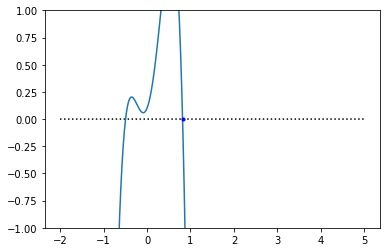

In [143]:
subs_dict = {
    α: 20,
    γ: .2,
    θ: .1,
    μ: 1
}
func = sym.lambdify(c, expr.subs(subs_dict))
speed = bisect(func, 0, 5)
xs = np.linspace(-2, 5, 20001)
plt.plot(xs, 0*xs, 'k:')
plt.plot(xs, func(xs))
plt.plot(speed, 0, 'b.')
plt.ylim(-1, 1)

subs_dict2 = {c: speed, **subs_dict}

In [144]:
speed

0.8179894612828775

In [145]:
U_numeric = sym.lambdify(ξ, U.subs(subs_dict2), modules=sympy_modules)

In [146]:
U_numeric(0)

0.10000000000006598

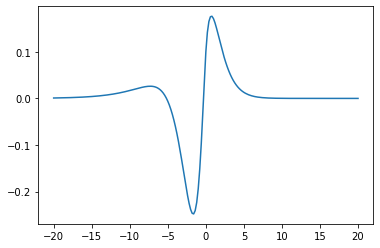

In [147]:
xs = np.linspace(-20, 20, 201)
plt.plot(xs, U_numeric(xs))

In [142]:
sym.limit(test.subs(subs_dict2), ξ, -sym.oo)

0

Cannot sustain fronts. Maybe it can sustain pulses.